<a href="https://colab.research.google.com/github/IshaGorasia/PCF/blob/main/ANN_PCF(Dispersion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neural_network import MLPRegressor       #trains iteratively since at each time step the partial derivatives of the 
                                                      #loss function with respect to the model parameters are computed to update the parameters.
from sklearn.model_selection import train_test_split  #splitting data arrays into two subsets: for training data and for testing data
from sklearn.preprocessing import StandardScaler      #StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance
import pandas as pd                                   #tells Python to bring the pandas data analysis library into your current environment.
import numpy as np                                    #The as np portion of the code then tells Python to give NumPy the alias of np.
import matplotlib.pyplot as plt                       #collection of command style functions that make matplotlib work
import seaborn as sns                                 #a library for making statistical graphics in Python

In [ ]:
from google.colab import files
files.upload()

Saving pcf_modeSoln_data_1.xlsx to pcf_modeSoln_data_1.xlsx
Saving pcf_modeSoln_data_manual_1.xlsx to pcf_modeSoln_data_manual_1.xlsx


{'pcf_modeSoln_data_1.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00J\x92%\x99\x9f\x01\x00\x00\xc4\t\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Reading the dataset
dataset = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name="SiO2-air-rings-4-dBYp-0.7")

In [ ]:
dataset

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um),neff,Aeff\n(um^2),dispersion\n(ps/km.nm),conf-loss\n(dB/cm),conf-loss-in-log10\n(dB/cm)
0,1.444,1,4,0.7,0.8,1.800000,1.27828,4.96730,-587.0550,1.851780e+02,2.267589
1,1.444,1,4,0.7,0.8,1.583330,1.29633,2.49561,-685.1410,4.018090e+01,1.604020
2,1.444,1,4,0.7,0.8,1.413220,1.31463,1.68857,-576.5430,6.514520e+00,0.813882
3,1.444,1,4,0.7,0.8,1.276120,1.33194,1.33313,-396.4210,9.140750e-01,-0.039018
4,1.444,1,4,0.7,0.8,1.163270,1.34753,1.13895,-229.8200,1.239610e-01,-0.906715
...,...,...,...,...,...,...,...,...,...,...,...
135,1.444,1,4,0.7,2.0,0.589655,1.46235,3.42493,70.5467,1.776040e-17,-16.750547
136,1.444,1,4,0.7,2.0,0.564356,1.46297,3.40588,68.4872,9.801990e-18,-17.008686
137,1.444,1,4,0.7,2.0,0.541139,1.46352,3.38857,66.5287,5.654400e-18,-17.247613
138,1.444,1,4,0.7,2.0,0.519757,1.46401,3.37276,64.6671,3.389280e-18,-17.469893


In [ ]:
X = []
Y= []

In [ ]:
x = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 8].values

In [ ]:
print(x)
print(y)

[[1.       4.       0.7      0.8      1.8     ]
 [1.       4.       0.7      0.8      1.58333 ]
 [1.       4.       0.7      0.8      1.41322 ]
 [1.       4.       0.7      0.8      1.27612 ]
 [1.       4.       0.7      0.8      1.16327 ]
 [1.       4.       0.7      0.8      1.06875 ]
 [1.       4.       0.7      0.8      0.988439]
 [1.       4.       0.7      0.8      0.919355]
 [1.       4.       0.7      0.8      0.859296]
 [1.       4.       0.7      0.8      0.806604]
 [1.       4.       0.7      0.8      0.76    ]
 [1.       4.       0.7      0.8      0.718487]
 [1.       4.       0.7      0.8      0.681275]
 [1.       4.       0.7      0.8      0.647727]
 [1.       4.       0.7      0.8      0.617329]
 [1.       4.       0.7      0.8      0.589655]
 [1.       4.       0.7      0.8      0.564356]
 [1.       4.       0.7      0.8      0.541139]
 [1.       4.       0.7      0.8      0.519757]
 [1.       4.       0.7      0.8      0.5     ]
 [1.       4.       0.7      1.       1.

In [ ]:
for i in x:
  X.append(i)
for i in y:
  Y.append(i)

In [ ]:
print(X)
print(Y)

[array([1. , 4. , 0.7, 0.8, 1.8]), array([1.     , 4.     , 0.7    , 0.8    , 1.58333]), array([1.     , 4.     , 0.7    , 0.8    , 1.41322]), array([1.     , 4.     , 0.7    , 0.8    , 1.27612]), array([1.     , 4.     , 0.7    , 0.8    , 1.16327]), array([1.     , 4.     , 0.7    , 0.8    , 1.06875]), array([1.      , 4.      , 0.7     , 0.8     , 0.988439]), array([1.      , 4.      , 0.7     , 0.8     , 0.919355]), array([1.      , 4.      , 0.7     , 0.8     , 0.859296]), array([1.      , 4.      , 0.7     , 0.8     , 0.806604]), array([1.  , 4.  , 0.7 , 0.8 , 0.76]), array([1.      , 4.      , 0.7     , 0.8     , 0.718487]), array([1.      , 4.      , 0.7     , 0.8     , 0.681275]), array([1.      , 4.      , 0.7     , 0.8     , 0.647727]), array([1.      , 4.      , 0.7     , 0.8     , 0.617329]), array([1.      , 4.      , 0.7     , 0.8     , 0.589655]), array([1.      , 4.      , 0.7     , 0.8     , 0.564356]), array([1.      , 4.      , 0.7     , 0.8     , 0.541139]), array([

In [ ]:
dataset = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name="SiO2-air-rings-4-dBYp-0.8")
x = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 8].values
for i in x:
  X.append(i)
for i in y:
  Y.append(i)

print(len(X))
print(len(Y))

280
280


In [ ]:
dataset = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name="SiO2-air-rings-4-dBYp-0.9")
x = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 8].values
for i in x:
  X.append(i)
for i in y:
  Y.append(i)

print(len(X))
print(len(Y))

420
420


In [ ]:
dataset = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name="SiO2-air-rings-4-dBYp-0.6")
x = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 8].values
for i in x:
  X.append(i)
for i in y:
  Y.append(i)

print(len(X))
print(len(Y))

559
559


In [ ]:
dataset = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name="SiO2-air-rings-5-dBYp-0.7")
x = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 8].values
for i in x:
  X.append(i)
for i in y:
  Y.append(i)

print(len(X))
print(len(Y))

699
699


In [ ]:
dataset = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name="SiO2-air-rings-5-dBYp-0.8")
x = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 8].values
for i in x:
  X.append(i)
for i in y:
  Y.append(i)

print(len(X))
print(len(Y))

839
839


In [ ]:
dataset = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name="SiO2-air-rings-5-dBYp-0.9")
x = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 8].values
for i in x:
  X.append(i)
for i in y:
  Y.append(i)

print(len(X))
print(len(Y))

979
979


In [ ]:
dataset = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name="SiO2-air-rings-5-dBYp-0.6")
x = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 8].values
for i in x:
  X.append(i)
for i in y:
  Y.append(i)

print(len(X))
print(len(Y))

1118
1118


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_X = scaler.fit_transform(X)

In [ ]:
Y = Y.reshape(-1,1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_Y = scaler.fit_transform(Y)

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(scaled_data_X, scaled_data_Y, test_size = 0.2, random_state = 100)

In [ ]:
print (x_train)

[[0.         1.         0.66666667 1.         0.4375    ]
 [0.         0.         1.         0.5        0.09025308]
 [0.         1.         0.         0.83333333 0.4375    ]
 ...
 [0.         0.         1.         0.5        0.2       ]
 [0.         0.         0.33333333 0.5        0.        ]
 [0.         1.         0.66666667 0.66666667 0.11363615]]


In [ ]:
print (x_test)

[[0.         1.         0.         0.16666667 0.59701538]
 [0.         0.         0.33333333 0.83333333 0.37572231]
 [0.         0.         0.66666667 1.         0.23584923]
 ...
 [0.         0.         0.         0.83333333 0.4375    ]
 [0.         1.         1.         0.83333333 0.        ]
 [0.         0.         0.         0.         0.13944231]]


In [ ]:
print (y_train)

In [ ]:
print (y_test)

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation = 'relu', alpha = 0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, random_state=1, max_iter = 2000). fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
J = reg.predict(x_test)

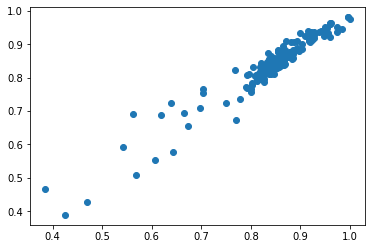

In [ ]:
plt.scatter(y_test, J)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_squared_error(y_test, J)

0.0005606084921750489

In [ ]:
r2_score(y_test, J)

0.9207606296721909

In [ ]:
mean_absolute_error(y_test, J)

0.016123509376616614

In [ ]:
print("root_mean_squared error of is: ",np.sqrt(mean_squared_error(y_test, J)))

root_mean_squared error of is:  0.023677172385549946
